### Pandas

```
Pandas DataFrame의 기초부터 실무에서 자주 사용하는 것들을 정리하였습니다.
```

#### 1. Pandas 개념 정리
* pandas의 **DataFrame**은 파이썬에서 데이터 분석과 조작을 위해 널리 사용되는 중요한 데이터 구조 중 하나입니다. 
* DataFrame은 엑셀 스프레드시트나 SQL 데이터베이스의 테이블과 유사하며, 정렬된 데이터 열의 집합으로 구성됩니다. 
* 각 열은 서로 다른 유형의 데이터(숫자, 문자열, 불리언 등)를 담을 수 있습니다. 
* 여기 DataFrame의 기본적인 특성과 기능들을 정리해 보겠습니다:

##### 1) 데이터 구조
* DataFrame은 2차원 레이블이 붙은 데이터 구조로, 각 열(column)은 서로 다른 데이터 타입을 가질 수 있습니다(예: float, int, datetime).
* 행(row)과 열(column)로 이루어져 있으며, 각 행과 열에는 레이블(인덱스)이 붙어 있습니다.
##### 2) 생성 방법
* DataFrame은 다양한 방법으로 생성할 수 있습니다. 가장 흔한 방법은 딕셔너리를 사용하는 것으로, 키가 열 이름이 되고 값이 데이터가 되는 구조입니다.
``` python
import pandas as pd

data = {
  'Name': ['John', 'Anna', 'Peter', 'Linda'],
  'Age': [28, 22, 34, 42],
  'City': ['New York', 'Paris', 'Berlin', 'London']
}

df = pd.DataFrame(data)
```

##### 3) 주요 기능
* 데이터 접근: 열에 접근하기 위해 df['Name']과 같이 열 이름을 사용하거나, df.Name과 같이 속성처럼 접근할 수 있습니다.
* 데이터 조작: 데이터 추가, 삭제, 수정 등을 할 수 있습니다. 예를 들어, 새 열 추가는 df['Country'] = 'USA'와 같이 할 수 있습니다.
* 필터링과 정렬: 특정 조건에 맞는 데이터만 선택하거나 데이터를 특정 기준에 따라 정렬할 수 있습니다.
* 결측치 처리: dropna(), fillna() 함수를 사용해 결측치를 처리할 수 있습니다.
* 그룹화와 집계: groupby() 메서드를 사용해 데이터를 그룹화하고 sum(), mean() 등의 함수로 집계할 수 있습니다.
* 병합과 조인: 여러 데이터프레임을 concat(), merge() 함수를 사용해 합치거나 조인할 수 있습니다.

##### 4) 입출력 기능
* pandas는 CSV, 엑셀 파일, SQL 데이터베이스, JSON 등 다양한 형식의 데이터를 읽고 쓸 수 있는 강력한 입출력 기능을 제공합니다.
* 예시: df.to_csv('output.csv'), pd.read_csv('data.csv')
* pandas의 DataFrame은 데이터 사이언스, 금융 분석, 웹 데이터 추출 등 다양한 분야에서 중요하게 사용되며, 그 유연성과 강력한 기능 덕분에 파이썬 데이터 분석의 핵심 도구로 자리 잡았습니다.

-----

In [ ]:
data = [[1, 2], [3, 4]]
df = pd.DataFrame(data, columns=['A', 'B'])

-----

아래는 ipynb 코드를 이용해 pandas를 실무에서 자주사용하는 것들 위주로 쭉 정리하였습니다.

In [7]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
# pd.__version__
# np.__version__

-----

#### 2. Pandas Dataframe 생성 
* pandas DataFrame 을 만들어 줄 수 있는 다양한 예제 입니다.
* pandas의 DataFrame에 입력으로 사용될 수 있는 데이터 타입은 매우 다양합니다. 여러 소스와 형식에서 데이터를 가져와 DataFrame을 생성할 수 있으며, 다음은 주요 데이터 소스 및 유형들입니다:

##### 2-1. python list
* 데이터가 하나의 python list로 구성되며, 그 내부 element는 여러개의 python dictionary로 구성된 경우
*  각 dictionary가 row가 되고 key가 column명이됨.

In [30]:
data = [{'A': 1, 'B': 2}, {'A': 3, 'B': 4}]
df = pd.DataFrame(data)
df

,A,B
0,1,2
1,3,4


##### 2-2. python dictionary(value가 python list)
* 데이터가 하나의 dictionary로 구성
* 딕셔너리의 각 element가 하나의 column이 됨
* key가 column명, value가 column의 데이터
* 단 value의 개수가 서로 다르면 error

In [34]:
data = {'A': [1, 3, 6, 2, 7], 'B': [2, 4, 1, 10, 35]}
df = pd.DataFrame(data)
df

,A,B
0,1,2
1,3,4
2,6,1
3,2,10
4,7,35


##### 2-3. python dictionary(value가 pandas series)

In [36]:
s1 = pd.Series([1, 3])
s2 = pd.Series([2, 4])
df = pd.DataFrame({'A': s1, 'B': s2})
df

,A,B
0,1,2
1,3,4


##### 2-4. numpy ndarray
* numpy 배열을 직접 사용하여 DataFrame을 생성할 수 있음
* 이 경우, 배열의 구조가 DataFrame의 row와 column구조로 직접 전환됩니다.

In [37]:
data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data, columns=['A', 'B'])
df

,A,B
0,1,2
1,3,4


##### 2-5. 파일 입력
파일 입력: CSV, 엑셀 파일, JSON, HDF5, SQL 데이터베이스 등 다양한 파일 형식과 데이터 소스에서 직접 데이터를 읽어 DataFrame을 생성할 수 있습니다.

``` python
df = pd.read_csv('filename.csv')
df = pd.read_excel('filename.xlsx')
```

-----

#### 3. Pandas 실무 사용 예 - Basic

In [43]:
np.random.seed(1) # random seed 설정
# data = np.random.randn(12,4) : 표준정규분포 random value로 이루어진 numpy ndarray 타입의 12 x 4 데이터를 pandas dataframe의 data 인자로 넣어줌
df = pd.DataFrame(data=np.random.randn(12,4), index=np.arange(0,12), columns=['x1', 'x2', 'x3', 'x4'])

In [44]:
df

,x1,x2,x3,x4
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


In [8]:
df.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [9]:
df.columns

Index(['1', '2', '3', '4'], dtype='object')

In [10]:
df.values

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ,  1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944, -1.09989127],
       [-0.17242821, -0.87785842,  0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023, -0.93576943],
       [-0.26788808,  0.53035547, -0.69166075, -0.39675353],
       [-0.6871727 , -0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ],
       [ 0.05080775, -0.63699565,  0.19091548,  2.10025514]])

In [17]:
df.head(10)

,1,2,3,4
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


In [18]:
df.tail(5)

,1,2,3,4
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455
11,0.050808,-0.636996,0.190915,2.100255


In [19]:
# DataFrame에 대한 다음과 같은 전체적인 요약정보를 보여줌.
# index, column, Non-Null count(null or not-null), Dtype(DataType), memory usage 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       12 non-null     float64
 1   2       12 non-null     float64
 2   3       12 non-null     float64
 3   4       12 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes


In [20]:
# dataframe에 대한 전체적인 통계정보를 보여줌
df.describe() 

,1,2,3,4
count,12.000000,12.000000,12.000000,12.000000
mean,-0.008268,-0.464053,0.364507,-0.059944
std,0.824440,0.857566,0.965801,1.228193
min,-1.117310,-2.301539,-0.747158,-2.060141
25%,-0.413606,-0.853369,-0.563940,-0.970069
50%,-0.182132,-0.624376,0.116565,-0.204709
75%,0.455631,-0.128424,1.215854,0.622622
max,1.624345,1.144724,1.744812,2.100255


In [45]:
df['x1'] # DataFrame의 특정 column(열) 가져오기

0     1.624345
1     0.865408
2     0.319039
3    -0.322417
4    -0.172428
5    -1.100619
6     0.900856
7    -0.267888
8    -0.687173
9    -1.117310
10   -0.191836
11    0.050808
Name: x1, dtype: float64

In [46]:
# pandase의 series연산으로 벡터화된 연산 진행
# -> (numpy의 universal function과 유사한 기능을 pandas도 지원해줌)
df['x1'] + 100 

0     101.624345
1     100.865408
2     100.319039
3      99.677583
4      99.827572
5      98.899381
6     100.900856
7      99.732112
8      99.312827
9      98.882690
10     99.808164
11    100.050808
Name: x1, dtype: float64

In [47]:
# DataFrame의 특정 컬럼을 기준으로 내림차순 정렬
# -> column기준 정렬이기 때문에, index 순서가 바뀌어있음
df.sort_values(by='x1', ascending=False)

,x1,x2,x3,x4
0,1.624345,-0.611756,-0.528172,-1.072969
6,0.900856,-0.683728,-0.122890,-0.935769
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
11,0.050808,-0.636996,0.190915,2.100255
4,-0.172428,-0.877858,0.042214,0.582815
10,-0.191836,-0.887629,-0.747158,1.692455
7,-0.267888,0.530355,-0.691661,-0.396754
3,-0.322417,-0.384054,1.133769,-1.099891
8,-0.687173,-0.845206,-0.671246,-0.012665


-----

4. Pandas 실무 사용 예 - 중급이상
* 위에는 기초적인 내용을 정리하였고, 이제부터는 좀더 고급 사용의 예제들을 정리하였습니다.

In [51]:
# .loc[]의 주요 사용법
# 1. DataFrame의 row 인덱싱 - DataFrame의 특정 row indexing
#     - df['x1']으로 column만 가져오는 것처럼 특정 row는 이렇게 indexing 할 수 있음
df.loc[1]

x1    0.865408
x2   -2.301539
x3    1.744812
x4   -0.761207
Name: 1, dtype: float64

In [50]:
# 2. DataFrame의 row 슬라이싱 - index명을 이용해서 slicing가능
#     - 이때 해당 row들의 모든 column 데이터 다 가져옴
df.loc[1 : 3]

,x1,x2,x3,x4
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891


In [57]:
# 3. 특정 row, column 지정도 가능 
print(df.loc[1, 'x3'])

# python list의 indexing과 비슷
a = [[1, 2, 3], [3, 4, 5]]
print(a[1][2])

1.74481176421648
5


In [68]:
# 4. boolean index 도 가능
print('df.loc[df[\'x1\'] > 0.3] 실행결과: \n')
print(df.loc[df['x1'] > 0.3]) # df['x1'] column의 element중, 0.3보다 큰 element의 row에 해당하는 모든 column의 element 가져오기

print('\n')

print('df.loc[df[\'x1\'] > 0.3, \'x3\'] 실행결과: \n')
print(df.loc[df['x1'] > 0.3, 'x3']) # df['x1'] column의 element중 0.3보다 큰 element의 row에 해당하는 'x3' column의 element가져오기

df.loc[df['x1'] > 0.3] 실행결과: 

         x1        x2        x3        x4
0  1.624345 -0.611756 -0.528172 -1.072969
1  0.865408 -2.301539  1.744812 -0.761207
2  0.319039 -0.249370  1.462108 -2.060141
6  0.900856 -0.683728 -0.122890 -0.935769


df.loc[df['x1'] > 0.3, 'x3'] 실행결과: 

0   -0.528172
1    1.744812
2    1.462108
6   -0.122890
Name: x3, dtype: float64


In [73]:
# 5. 여려 row, column 선택
# 두개의 python list(하나는 df의 row, 하나는 df의 column)를 .loc[]안에 넣어줌
df.loc[[1, 8], ['x1', 'x4']]

,x1,x4
1,0.865408,-0.761207
8,-0.687173,-0.012665


In [74]:
#6. row slicing + column 선택
df.loc[1:5, ['x1', 'x3']]

,x1,x3
1,0.865408,1.744812
2,0.319039,1.462108
3,-0.322417,1.133769
4,-0.172428,0.042214
5,-1.100619,0.901591


In [75]:
# dataframe에 조건식을 적용해주면 조건에 만족하는지 여부를 알려주는 "mask"가 생깁니다.
# Q1. df에서 X3 column에 있는 원소들중에 양수(>0)만 출력해주세요!
for n in df['x3']:
  if n > 0:
    print(n)

mask = df['x3'] > 0
df[mask] ## boolean mask를 DataFrame에 indexing하면 True에 해당하는 위치의 row만 선택됨

# boolean으로 뽑힌 x3 column에 있는 데이터만 선택하는 2가지 방법 - 둘중, loc() 이용을 추천
# df[mask]['x3']
df.loc[mask, 'x3']

1.74481176421648
1.462107937044974
1.1337694423354374
0.04221374671559283
0.9015907205927955
1.6598021771098705
0.19091548466746602


1     1.744812
2     1.462108
3     1.133769
4     0.042214
5     0.901591
9     1.659802
11    0.190915
Name: x3, dtype: float64

In [40]:
# DataFrame에서 slicing을 이용하여 특정 column의 row를 잘라 가져올 수 있습니다.
df['1'][:5]

0    1.624345
1    0.865408
2    0.319039
3   -0.322417
4   -0.172428
Name: 1, dtype: float64

In [76]:
# Q2. df에서 x1 column에 있는 원소중 < 0.5 인 row의 x2 column 원소 출력
df.loc[df['x1'] < 0.5, 'x2']

2    -0.249370
3    -0.384054
4    -0.877858
5     1.144724
7     0.530355
8    -0.845206
9     0.234416
10   -0.887629
11   -0.636996
Name: x2, dtype: float64

In [77]:
# .iloc[] - 2차원 리스트 indexing과 같은 방식으로 사용
# integer-location based indexing
df.iloc[1, 1]  # column 이름(x1,x2 ,,)와 별개로 numpy처럼 DataFrame 인덱싱 가능
df.iloc[[3,4], [1,2]] # row와 column을 이런식으로 indexing도 가능

,x2,x3
3,-0.384054,1.133769
4,-0.877858,0.042214


In [81]:
# Q3. 2차원 indexing에 뒤에가 : 면 어떤 의미일까요?
df.iloc[:,[1,2,3]]

# df.iloc[0, :]

x1    1.624345
x2   -0.611756
x3   -0.528172
x4   -1.072969
Name: 0, dtype: float64

In [106]:
# 여러 DataFrame 합치기
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B4', 'B5'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A1', 'A5', 'A3', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A1', 'A10', 'A3'],
                    'B': ['B4', 'B5', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [99]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [100]:
df2

,A,B,C,D
4,A1,B4,C4,D4
5,A5,B5,C5,D5
6,A3,B6,C6,D6
7,A7,B7,C7,D7


In [101]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A1,B9,C9,D9
10,A10,B10,C10,D10
11,A3,B11,C11,D11


.concat()를 이용하여 DataFrame Merge하는 방법

In [83]:
pd.concat([df1, df2, df3]) #column을 기준으로 합침

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [87]:
# 기존 index명이 초기화되고 0,1,2,3...으로 바뀜
df2.reset_index(drop=True) 

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [90]:
# axis = 0 : column 기준으로 위 -> 아래로 합침
# axis = 1 : row(index)를 기준으로 왼쪽 -> 오른쪽으로 합침. row 이름이 다 다르기 때문에 이상하게 합쳐짐
pd.concat([df1, df2, df3], axis=1) 

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [93]:
pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True), df3.reset_index(drop=True)], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


.merge()를 이용하여 DataFrame Merge하는 방법

In [107]:
# SQL의 join operation과 유사한 기능
# left와 right의 두 DataFrame에서 'A'라는 공통 column의 겹치는 element가 있다면 각 DataFrame의 해당 row의 모든 column 정보를 가져옴
# 결과해석
# 'A' columng은 left, right 두 DataFrame의 공통 column에서 element가 겹치는 row만 가져옴
# _x는 left DataFrame의 각 columng에서 해당 row element
# _y는 right DataFrame 
pd.merge(left = df1, right = df2, on = 'A', how = 'inner')

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,A1,B1,C1,D1,B4,C4,D4
1,A3,B5,C3,D3,B6,C6,D6


In [108]:
pd.merge(left = df1, right = df2, on = 'B', how = 'inner')

,A_x,B,C_x,D_x,A_y,C_y,D_y
0,A2,B4,C2,D2,A1,C4,D4
1,A3,B5,C3,D3,A5,C5,D5


In [110]:
# merge 결과의 column 순서 변경도 가능
pd.merge(left = df1, right = df2, on = 'B', how = 'inner')[['B', 'A_x', 'C_x', 'D_x', 'A_y', 'C_y', 'D_y']]

,B,A_x,C_x,D_x,A_y,C_y,D_y
0,B4,A2,C2,D2,A1,C4,D4
1,B5,A3,C3,D3,A5,C5,D5


In [111]:
# how='left' 겹치지 않는 element는 NaN으로 처리
pd.merge(df1, df2, on='A', how='left')

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,B4,C4,D4
2,A2,B4,C2,D2,NaN,NaN,NaN
3,A3,B5,C3,D3,B6,C6,D6


Source : https://www.kaggle.com/c/titanic/data

In [115]:
#. 데이터 불러오기
titanic = pd.read_csv('./train.csv')

In [116]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Pivot Table을 이용하여 데이터 살펴보기
* pivot table이란 기존 테이블 구조를 특정 column을 기준으로 재구조화한 테이블을 말합니다.
* 특정 column을 기준으로 pivot하기 때문에, 어떤 column에 어떤 연산을 하느냐에 따라서 만들어지는 결과가 바뀝니다.
* 주로 어떤 column을 기준으로 데이터를 해석하고 싶을 때 사용합니다.

In [118]:
# 성별을 기준으로 생존률 파악 --> Mean vs Sum

pd.pivot_table(data=titanic, index='Sex', values='Survived', aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,Survived,Survived,Survived
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


In [119]:
# 사회 계급을 기준으로 생존률 파악
pd.pivot_table(data=titanic, index='Pclass', values='Survived', aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,Survived,Survived,Survived
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [120]:
# 성별, 사회 계급을 기준으로 생존률 파악
pd.pivot_table(data=titanic, index=['Sex', 'Pclass'], values='Survived', aggfunc=['count', 'sum', 'mean'])

count      sum      mean
              Survived Survived  Survived
Sex    Pclass                            
female 1            94       91  0.968085
       2            76       70  0.921053
       3           144       72  0.500000
male   1           122       45  0.368852
       2           108       17  0.157407
       3           347       47  0.135447

<Axes: xlabel='Sex,Pclass'>

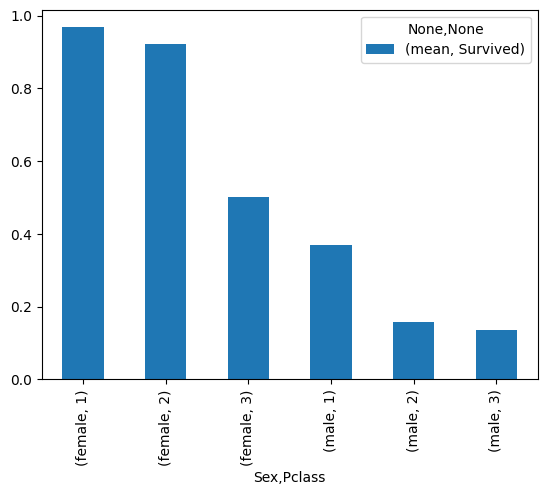

In [124]:
import matplotlib.pyplot as plt
pd.pivot_table(data=titanic, index=['Sex', 'Pclass'], values='Survived', aggfunc=['mean']).plot(kind='bar')

In [126]:
# 여성 승객의 평균나이 계산
titanic.loc[titanic.Sex == 'female', 'Age'].mean()
# np.mean(titanic.loc[titanic.Sex == 'female', 'Age'])

27.915708812260537

In [144]:
# 1등석 탑승자 중 최대 요금 낸 사람의 이름
# df2 = titanic.loc[titanic.Pclass == 1, ['Fare', 'Name']].sort_values(by='Fare', ascending=False)
df2 = titanic.loc[titanic.Pclass == 1, ['Fare', 'Name']]
df2.loc[df2.Fare == df2.Fare.max(), 'Name']

258                      Ward, Miss. Anna
679    Cardeza, Mr. Thomas Drake Martinez
737                Lesurer, Mr. Gustave J
Name: Name, dtype: object

In [154]:
# 1등석 탑승자 중 승선지가 Q(Queenstown)인 사람의 수는?
# titanic.loc[(titanic.Pclass == 1) & (titanic.Embarked == 'Q'), 'Name'].count()
titanic.loc[(titanic.Pclass == 1) & (titanic.Embarked == 'Q'), 'Name'].shape[0]

2

In [165]:
# 승선한 곳이 'S'인 사람들 중 생존자 수
titanic.loc[titanic.Embarked.isin(['S']), 'Survived'].sum()
#titanic.loc[titanic.Embarked == 'S', 'Survived'].sum()
# pd.pivot_table(data = titanic, index = 'Embarked', values = 'Survived', aggfunc='sum')

217

In [172]:
# 미혼 여성 중 나이를 모르는 사람의 수

titanic.info()
# age에 결측치 존재 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
# 미혼 여성 중 나이를 모르는 사람의 수

# .str.contains('문자열') : dataframe의 특정 컬럼에 특정 문자열이 포함되있는지 여부를 boolean으로 리턴
# 특
#titanic.loc[titanic.Name.str.contains('Miss'), 'Age'].isnull().sum()
titanic.loc[titanic.Name.str.contains('Miss') & titanic.Age.isnull()].shape[0]
#titanic.loc[titanic.Name.str.contains('Miss') & titanic.Age.isnull(), 'Name'].count()

36